In [1]:
def create_large_text_file(file_path, size_in_mb):
    with open(file_path, 'w') as file:
        file.write('A' * (size_in_mb * 1024 * 1024))

# Example usage
create_large_text_file('file_200MB.txt', 200)
create_large_text_file('file_400MB.txt', 400)
create_large_text_file('file_600MB.txt', 600)
create_large_text_file('file_800MB.txt', 800)
create_large_text_file('file_1000MB.txt', 1000)


File Size	C	C++	Java	R	Python
200MB	0.01	0.00	0.67	0.25	0.12
400MB	0.00	0.00	0.18	0.04	0.08
600MB	0.00	0.00	0.18	0.04	0.11
800MB	0.01	0.00	0.21	0.04	0.08
1000MB	0.00	0.01	0.24	0.04	0.08


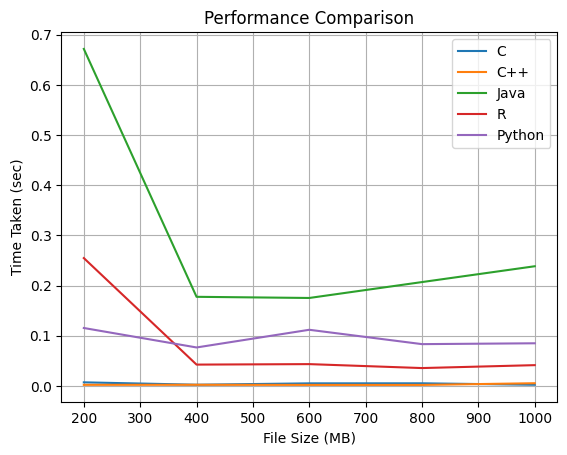

In [2]:
import os
import time
import subprocess
import matplotlib.pyplot as plt

file_sizes = [200, 400, 600, 800, 1000]
languages = ['C', 'C++', 'Java', 'R', 'Python']
results = {lang: [] for lang in languages}

def create_large_text_file(file_path, size_in_mb):
    with open(file_path, 'w') as file:
        file.write('A' * (size_in_mb * 1024 * 1024))

def run_command(command):
    start_time = time.time()
    subprocess.run(command, shell=True)
    end_time = time.time()
    return end_time - start_time

# Create large text files
for size in file_sizes:
    create_large_text_file(f'file_{size}MB.txt', size)

# Run each program and record the time taken
for size in file_sizes:
    for lang in languages:
        if lang == 'C':
            command = f'./convert_to_uppercase_c file_{size}MB.txt'
        elif lang == 'C++':
            command = f'./convert_to_uppercase_cpp file_{size}MB.txt'
        elif lang == 'Java':
            command = f'java ConvertToUppercase file_{size}MB.txt'
        elif lang == 'R':
            command = f'Rscript convert_to_uppercase.R file_{size}MB.txt'
        elif lang == 'Python':
            command = f'python convert_to_uppercase.py file_{size}MB.txt'

        time_taken = run_command(command)
        results[lang].append(time_taken)

# Print results in table format
print("File Size\tC\tC++\tJava\tR\tPython")
for i, size in enumerate(file_sizes):
    print(f"{size}MB\t{results['C'][i]:.2f}\t{results['C++'][i]:.2f}\t{results['Java'][i]:.2f}\t{results['R'][i]:.2f}\t{results['Python'][i]:.2f}")

# Plot the results
for lang in languages:
    plt.plot(file_sizes, results[lang], label=lang)

plt.xlabel('File Size (MB)')
plt.ylabel('Time Taken (sec)')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()
